In [897]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


# 1 Получите и загрузите данные

In [898]:
df = pd.read_csv("./titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2 Удалите все пропущенные значения и категориальные переменные.

In [899]:
# Удалим признаки, которые предположительно не влияют на оценку Survived
# ID , имя, опалата, номер билета и порт высадки
df_train = df.drop(
    ["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1
)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [900]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [901]:
# Удалим пропущенные Age
df_train = df_train.drop(df_train[df_train["Age"].isna()].index)

In [902]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


# 2.1. Обучение модели

In [903]:
X = pd.get_dummies(df_train, columns=["Sex"])
X = X.drop(["Survived"], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,False,True
1,1,38.0,1,0,True,False
2,3,26.0,0,0,True,False
3,1,35.0,1,0,True,False
4,3,35.0,0,0,False,True


In [904]:
y = df_train["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [905]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [906]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 2.3. Выберете и посчитайте метрику качества.

In [907]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8161120840630472, 0.7552447552447552)

# 3. Снова загрузите полные данные.

In [908]:
df = pd.read_csv("./titanic/train.csv")

# 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

1. Признаки  **PassengerId, Name и Ticket** имеют уникальные значения для каждой записи и не имеют смысла для обучения
2. Признак **Embarked** (порт отправления) не будет влиять на то выжил ли пассажир
3. Признак **Cabin** имеет слишком мноно пропусков а также уникален для многих пассажиров, а с учетом наличия Pclass достаточно будет использовать его
4. Признак **Fare** имеет большой разборс даже в рамках одного класса. Зона проживания на корабле больше зависит от класса, который размещается на одной из палуб. Я бы этом признак исключил, как скорее вредно влияющий.

5. Признак **Age** можно попробовать восстановить из среднего показателя от агрегации признаков - Sex, Pclass.

In [909]:
# Удалим уникальные признаки
df_train = df.drop(
    ["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1
)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


# 5. Проверьте данные на наличие пропущенных значений.

## a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [910]:
len(df_train.loc[(df_train["Age"].isna())]) / len(
    df_train
)

0.19865319865319866

**Итого** от очистки пропусков в столбцах Age и Embarked удалиться ~20% данных

## b) Заполните пропуски

In [911]:
# Выясним средний возраст по полу и классу
age_mean = (
    df_train.groupby(by=["Sex", "Pclass"])[["Age"]].agg(["mean", "count"]).reset_index()
)
age_mean

Sex Pclass        Age      
                       mean count
0  female      1  34.611765    85
1  female      2  28.722973    74
2  female      3  21.750000   102
3    male      1  41.281386   101
4    male      2  30.740707    99
5    male      3  26.507589   253

In [912]:
# Заполним пробелы в возрасте для мужчин всех классов
male_1 = age_mean[(age_mean["Sex"] == "male") & (age_mean["Pclass"] == 1)][
    "Age", "mean"
].values[0]

male_2 = age_mean[(age_mean["Sex"] == "male") & (age_mean["Pclass"] == 2)][
    "Age", "mean"
].values[0]

male_3 = age_mean[(age_mean["Sex"] == "male") & (age_mean["Pclass"] == 3)][
    "Age", "mean"
].values[0]


df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "male") & (df_train["Pclass"] == 1), "Age"] = round(
    male_1
)
df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "male") & (df_train["Pclass"] == 2), "Age"] = round(
    male_2
)
df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "male") & (df_train["Pclass"] == 3), "Age"] = round(
    male_3
)

In [913]:
# Заполним пробелы в возрасте для женщин всех классов
female_1 = age_mean[(age_mean["Sex"] == "female") & (age_mean["Pclass"] == 1)][
    "Age", "mean"
].values[0]

female_2 = age_mean[(age_mean["Sex"] == "female") & (age_mean["Pclass"] == 2)][
    "Age", "mean"
].values[0]

female_3 = age_mean[(age_mean["Sex"] == "female") & (age_mean["Pclass"] == 3)][
    "Age", "mean"
].values[0]


df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "female") & (df_train["Pclass"] == 1), "Age"] = (
    round(female_1)
)
df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "female") & (df_train["Pclass"] == 2), "Age"] = (
    round(female_2)
)
df_train.loc[(df_train["Age"].isna()) & (df_train["Sex"] == "female") & (df_train["Pclass"] == 3), "Age"] = (
    round(female_3)
)


In [914]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.382907,0.523008,0.381594
std,0.486592,0.836071,13.260272,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,27.000000,0.000000,0.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


# 6. Категориальные переменные переведите в цифровые значения.

In [915]:
from sklearn.preprocessing import LabelEncoder

In [916]:
le = LabelEncoder()
le.fit(df_train["Sex"])

df_train["Sex"] = pd.Series(le.transform(df_train["Sex"]))

df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# 7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

<Axes: >

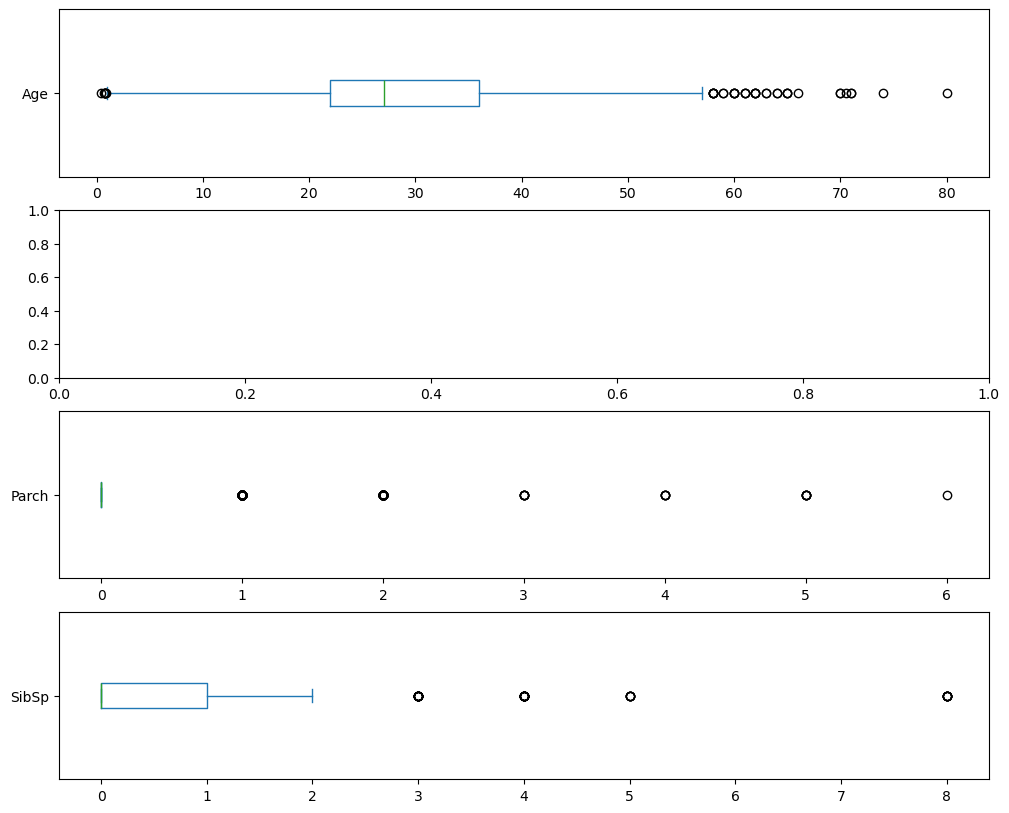

In [917]:
fig, ax = plt.subplots(4, 1, figsize=(12, 10))
df_train["Age"].plot.box(vert=False, ax=ax[0])
df_train["Parch"].plot.box(vert=False, ax=ax[2])
df_train["SibSp"].plot.box(vert=False, ax=ax[3])

## 7.1. Age

In [918]:
up_q = np.percentile(df_train['Age'], 75)
low_q = np.percentile(df_train['Age'], 25)
up_w = df_train['Age'].loc[(df_train['Age'] <= up_q + 1.5 * (up_q - low_q))].max()

len(df_train.loc[df_train['Age'] > up_w])

33

В Age 33 выброса, можно удалить

In [919]:
df_train = df_train.loc[df_train['Age'] <= up_w]

## 7.2. Parch

В данном случае также достаточно большое количество выбросов, можно установить границу на 2 (на боксплоте отметка выбросов на 2 гораздо ярче чем на последующих значениях).

In [920]:
df_train = df_train.loc[df_train['Parch'] <= 2]

## 7.3. SibSp

In [921]:
len(df_train.loc[df_train['SibSp'] > 2])

46

Выбросов немного, их можно удалить.

In [922]:
df_train = df_train.loc[df_train['SibSp'] <= 2]

# 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

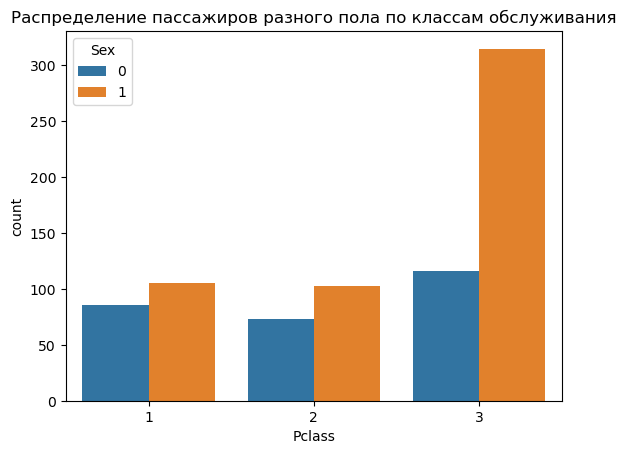

In [923]:
sns.countplot(data=df_train, x='Pclass', hue='Sex')
plt.title('Распределение пассажиров разного пола по классам обслуживания')
plt.show()

Пассажиров мужского пола и 3го класса обслуживания больше всего. 1 и 2 класс примерно равны.

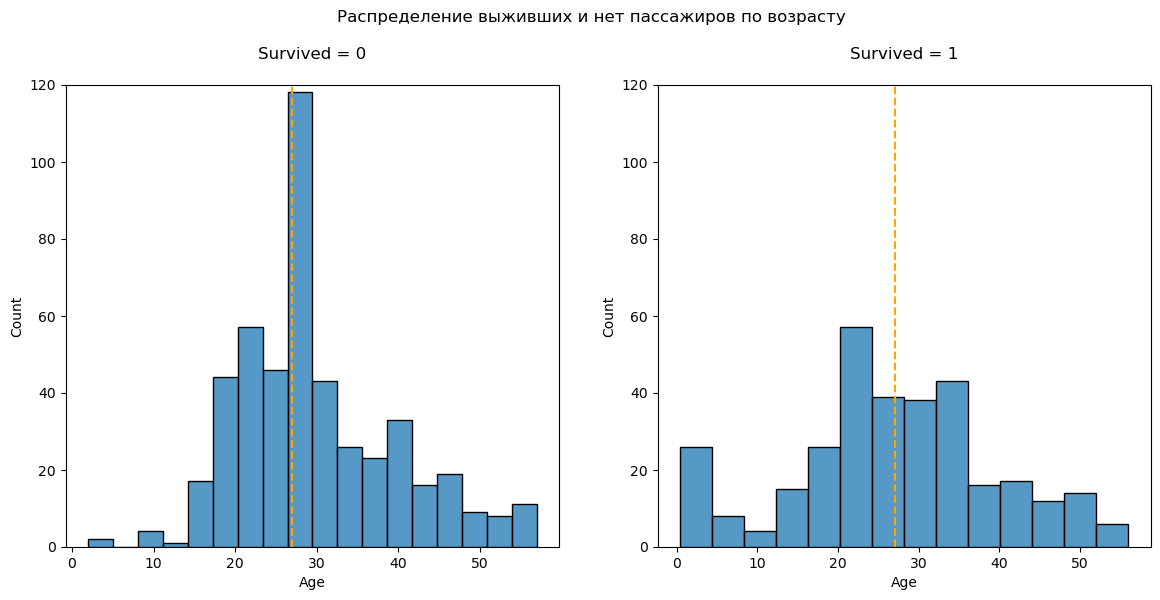

In [924]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Распределение выживших и нет пассажиров по возрасту', va='bottom')

sns.histplot(data=df_train[df_train['Survived'] == 0], x='Age', ax=ax[0]).set_title('Survived = 0\n')
sns.histplot(data=df_train[df_train['Survived'] == 1], x='Age', ax=ax[1]).set_title('Survived = 1\n')

for i in range(2):
  ax[i].axvline(x=df_train[df_train['Survived'] == i].Age.median(), color='orange', ls='--')

plt.setp(ax, ylim=(0, 120))
plt.show()

Количество выживших значительно меньше.
При этом пассажиры до 10 лет в основном в числе выживших (детей спасают в первую очередь).

Медианное значение примерно одинаковое. На борту были в основном +-30летние пассажиры.

# 9. Попробуйте математически преобразовать признак Age.

In [925]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train["Age_scaler"] = scaler.fit_transform(df_train[["Age"]])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Age_scaler
0,0,3,1,22.0,1,0,-0.608836
1,1,1,0,38.0,1,0,0.832679
2,1,3,0,26.0,0,0,-0.248457
3,1,1,0,35.0,1,0,0.562395
4,0,3,1,35.0,0,0,0.562395


# 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [926]:
X = df_train
X = X.drop(['Age', 'Survived'], axis=1)

X.head()

,Pclass,Sex,SibSp,Parch,Age_scaler
0,3,1,1,0,-0.608836
1,1,0,1,0,0.832679
2,3,0,0,0,-0.248457
3,1,0,1,0,0.562395
4,3,1,0,0,0.562395


In [927]:
y = df_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [928]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [929]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [930]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8072100313479624, 0.84375)

Значение accuracy увеличилось:
- для тренировочных данных = 0.8
- для тестовых данных = 0.84

# 11. Сформулируйте выводы по проделанной работе.

**a) Кратко опишите какие преобразования были сделаны и почему.**

- Удаление пропусков привело бы к потере ~20% данных.
1. Признаки  **PassengerId, Name и Ticket** имеют уникальные значения для каждой записи и не имеют смысла для обучения
2. Признак **Embarked** (порт отправления) не будет влиять на то выжил ли пассажир
3. Признак **Cabin** имеет слишком мноно пропусков а также уникален для многих пассажиров, а с учетом наличия Pclass достаточно будет использовать его
4. Признак **Fare** имеет большой разброс даже в рамках одного класса. Зона проживания на корабле больше зависит от класса, который размещается на одной из палуб. Я бы этом признак исключил, как скорее вредно влияющий.

5. Признак **Age** можно попробовать восстановить из среднего показателя от агрегации признаков - Sex, Pclass.

**b) Сравните метрики моделей из п. 2 и п. 10.**

- Метрики из п2:
(0.816, 0.755)

- Метрики из п10:
(0.807, 0.843)

**c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.**

- Целесообразно и выбранный способ должен зависеть от решаемой задачи
- Необходимо смотреть соотнешение и целостость/кач-во данных и принимать решение о потребности их дообработки, т.к. заполнение пропусков может исказить результат и привести к неверным выводам